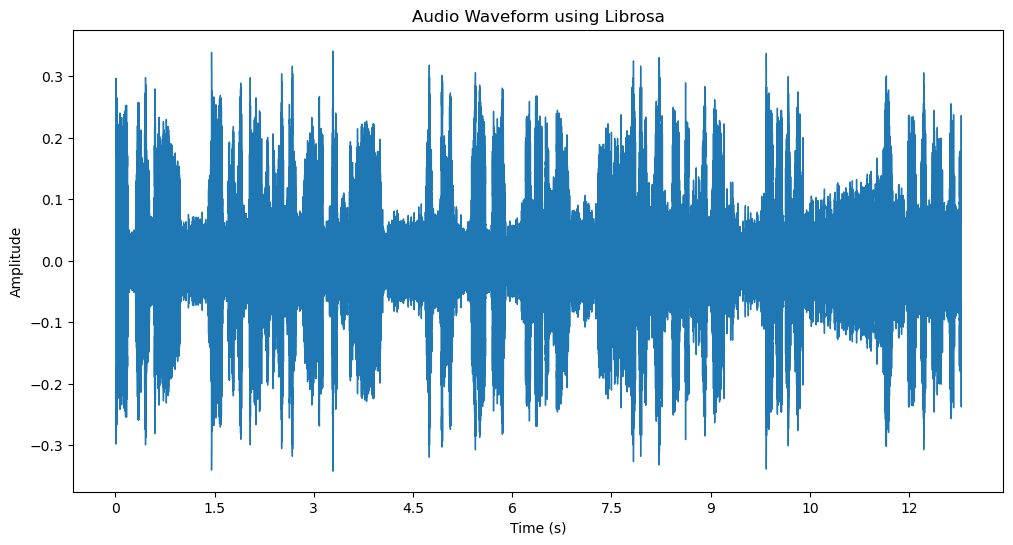

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Tải tệp âm thanh
filename = 'your_audio_file.wav'
audio_signal, sample_rate = librosa.load("../audio_segment_2.wav", sr=None)

# Tạo biểu đồ sóng âm thanh
plt.figure(figsize=(12, 6))
librosa.display.waveshow(audio_signal, sr=sample_rate)
plt.title('Audio Waveform using Librosa')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


/tmp/ipykernel_1063137/2039017038.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_signal, sample_rate = librosa.load(filename, sr=None)
/home/thiendc/projects/.thienenv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


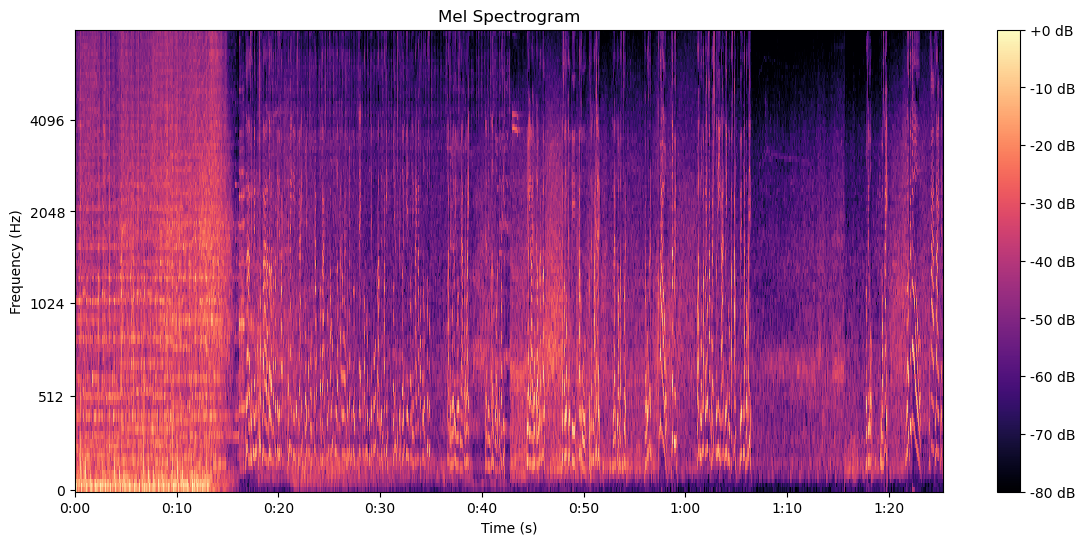

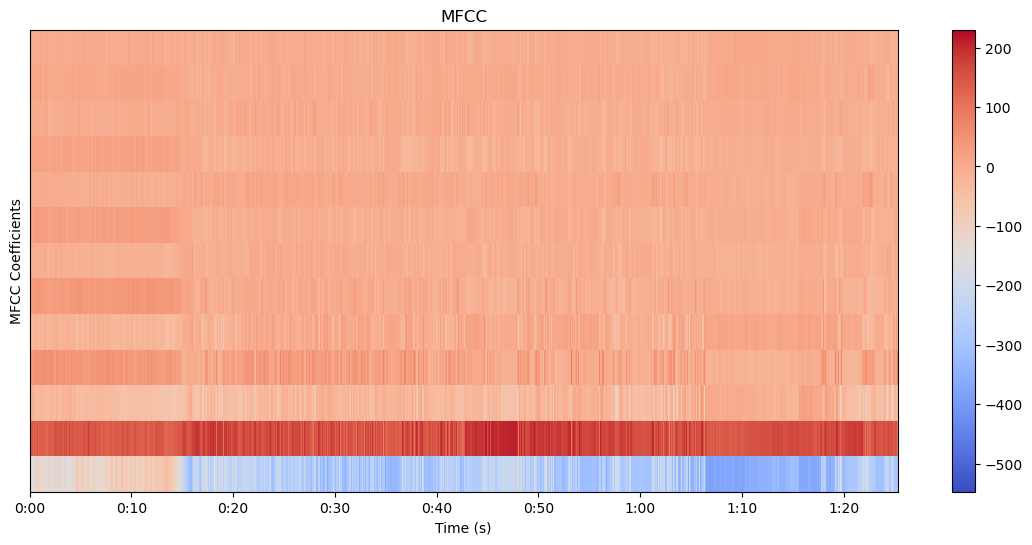

In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Tải tệp âm thanh
filename = '/home/thiendc/projects/video_summarization/data/sample_tv360/gt/chunk_1_gt.mp4'
audio_signal, sample_rate = librosa.load(filename, sr=None)

# Tạo Mel Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=audio_signal, sr=sample_rate, n_mels=128, fmax=8000)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Tạo biểu đồ Mel Spectrogram
plt.figure(figsize=(14, 6))
librosa.display.specshow(mel_spectrogram_db, sr=sample_rate, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

# Tạo biểu đồ MFCC
mfcc = librosa.feature.mfcc(y=audio_signal, sr=sample_rate, n_mfcc=13)
plt.figure(figsize=(14, 6))
librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()


In [19]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Tải âm thanh
audio_file = '../audio_segment_4.wav'
y, sr = librosa.load(audio_file, sr=None)

# Compute short-time Fourier transform (STFT)
stft = librosa.stft(y)
magnitude = np.abs(stft)

# Calculate the root mean square (RMS) energy for each frame
rms = librosa.feature.rms(S=magnitude)

# Detect silent frames (possible background noise segments) by thresholding
threshold = np.median(rms) * 0.5  # Adjust threshold as needed
silence_frames = np.where(rms < threshold)[1]

# Convert frame indices to time stamps
times = librosa.frames_to_time(silence_frames, sr=sr)

# Group consecutive silent frames into segments
segments = []
start = times[0]
for i in range(1, len(times)):
    if times[i] - times[i-1] > 1:  # 0.1 seconds as gap tolerance
        end = times[i-1]
        segments.append((start, end))
        start = times[i]
segments.append((start, times[-1]))  # Add the last segment

# Print the start and end times for detected background noise segments
for i, (start, end) in enumerate(segments):
    print(f"Segment {i+1}: Start = {start:.2f} sec, End = {end:.2f} sec")

Segment 1: Start = 1.10 sec, End = 1.13 sec
Segment 2: Start = 2.22 sec, End = 3.47 sec
Segment 3: Start = 4.54 sec, End = 4.77 sec
Segment 4: Start = 9.09 sec, End = 12.21 sec


In [6]:
import librosa
import numpy as np

# Tải tệp âm thanh
filename = '../audio_segment_1.wav'
audio_signal, sample_rate = librosa.load(filename, sr=None)

# Chia âm thanh thành hai đoạn khác nhau
segment_1 = audio_signal[int(3 * sample_rate):int(4.5 * sample_rate)]
segment_2 = audio_signal[int(5 * sample_rate):int(13 * sample_rate)]

# Tính RMS
rms_1 = np.mean(librosa.feature.rms(y=segment_1))
rms_2 = np.mean(librosa.feature.rms(y=segment_2))

# Tính Spectral Centroid
centroid_1 = np.mean(librosa.feature.spectral_centroid(y=segment_1, sr=sample_rate))
centroid_2 = np.mean(librosa.feature.spectral_centroid(y=segment_2, sr=sample_rate))

# Tính Zero-Crossing Rate
zcr_1 = np.mean(librosa.feature.zero_crossing_rate(y=segment_1))
zcr_2 = np.mean(librosa.feature.zero_crossing_rate(y=segment_2))

# In ra kết quả
print("Segment 1 - RMS:", rms_1, "Spectral Centroid:", centroid_1, "Zero-Crossing Rate:", zcr_1)
print("Segment 2 - RMS:", rms_2, "Spectral Centroid:", centroid_2, "Zero-Crossing Rate:", zcr_2)


Segment 1 - RMS: 0.056981564 Spectral Centroid: 2242.5739887814752 Zero-Crossing Rate: 0.05538236177884615
Segment 2 - RMS: 0.07401396 Spectral Centroid: 1557.2383095938274 Zero-Crossing Rate: 0.034301212043591656


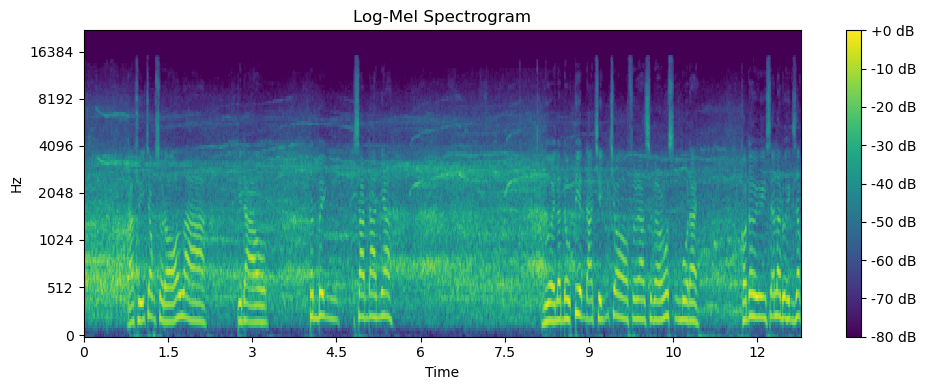

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Load an audio file
audio_path = '../audio_segment_4.wav'  # Replace with your audio file path
y, sr = librosa.load(audio_path, sr=None)

# Compute the Mel spectrogram
n_mels = 128  # Number of Mel bands to generate
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, fmax=sr/2)
log_S = librosa.power_to_db(S, ref=np.max)

# Plot the Log-Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel', fmax=sr/2, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram')
plt.tight_layout()
plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Load an audio file
def bg_segment(audio_file):# Thay thế bằng đường dẫn đến file âm thanh của bạn
    y, sr = librosa.load(audio_file, sr=None)

    # Compute the Log Mel-spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    log_S = librosa.power_to_db(S, ref=np.max)

    # Calculate mean energy across time
    mean_energy = np.mean(log_S, axis=0)

    # Use a threshold to segment background and voice
    # Threshold chosen empirically; you can adjust based on your audio characteristics
    threshold = np.percentile(mean_energy, 30)  # 30th percentile as a sample threshold
    background_mask = mean_energy < threshold
    voice_mask = mean_energy >= threshold

    # Convert masks to time intervals
    times = librosa.frames_to_time(range(len(mean_energy)), sr=sr)
    background_segments = times[background_mask]
    return background_segments
# voice_segments = times[voice_mask]

# # Plot Log Mel-spectrogram with segmentation
# plt.figure(figsize=(14, 6))
# librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel', fmax=8000, cmap='viridis')
# plt.colorbar(format='%+2.0f dB')
# plt.vlines(background_segments, ymin=0, ymax=8000, color='blue', linestyle='--', label='Background')
# plt.vlines(voice_segments, ymin=0, ymax=8000, color='red', linestyle='-', label='Voice')
# plt.title('Log Mel-spectrogram with Background and Voice Segmentation')
# plt.xlabel('Time (s)')
# plt.ylabel('Frequency (Hz)')
# plt.legend()
# plt.show()

# # Print segment times for each detected voice segment
# print("Voice Segments:")
# for i, time in enumerate(voice_segments):
#     print(f"Voice Segment {i+1}: at {time:.2f} seconds")


In [8]:
import json
import subprocess
def get_video_fps(file_path):
    cmd = [
        'ffprobe', 
        '-v', 'quiet', 
        '-print_format', 'json', 
        '-show_streams', 
        file_path
    ]
    result = subprocess.run(cmd, capture_output=True, text=True)
    data = json.loads(result.stdout)

    if 'streams' in data and len(data['streams']) > 0:
        fps_info = data['streams'][0].get('r_frame_rate', '0/1')
        numerator, denominator = map(int, fps_info.split('/'))
        fps = numerator / denominator
        return fps
    else:
        raise ValueError("Không thể lấy thông tin FPS từ dữ liệu trả về của ffprobe.")

def get_video_duration(input_file):
    cmd = [
        'ffprobe', 
        '-v', 'quiet', 
        '-print_format', 'json', 
        '-show_format', 
        '-show_streams', 
        input_file
    ]
    result = subprocess.run(cmd, capture_output=True, text=True)
    try:
        data = json.loads(result.stdout)
        if 'format' in data and 'duration' in data['format']:
            return float(data['format']['duration'])
        else:
            raise ValueError("Không tìm thấy thông tin độ dài video.")
    except json.JSONDecodeError:
        raise ValueError("Lỗi phân tích cú pháp JSON từ ffprobe.")

In [14]:
import math

def split_segments_by_distance(array):
    clusters = []
    cluster = [array[0]]  # Bắt đầu với phần tử đầu tiên

    for i in range(1, len(array)):
        # Nếu distance giữa phần tử hiện tại và phần tử trước đó lớn hơn 2, bắt đầu cụm mới
        if array[i] - array[i - 1] > 3:
            clusters.append(cluster)  # Thêm cụm hiện tại vào danh sách
            cluster = [array[i - 1], array[i]]   # Bắt đầu cụm mới
        else:
            cluster.append(array[i])  # Thêm phần tử vào cụm hiện tại

    clusters.append(cluster)  # Thêm cụm cuối cùng vào danh sách
    return clusters

# background_segments = bg_segment(audio_file)
# segments = split_segments_by_distance(background_segments)
# length_segment = len(segments)


def get_start_end(segments):
    start = None
    end = None
    length_segment = len(segments)
    for i in range(length_segment):
        diff = segments[i][-1] - segments[i][0]
        if diff > 40:
            start = segments[i][0]
            end = math.ceil(segments[i][-1])
            break

    # Nếu không có đoạn nào > 30, check các đoạn > 25
    if start is None:
        for i in range(length_segment):
            diff = segments[i][-1] - segments[i][0]
            if diff > 35:
                start = segments[i][0]
                end = math.ceil(segments[i][-1])
                break

    # Nếu không có đoạn nào > 25, check các đoạn > 20
    if start is None:
        for i in range(length_segment):
            diff = segments[i][-1] - segments[i][0]
            if diff > 30:
                start = segments[i][0]
                end = math.ceil(segments[i][-1])
                break
    
    if start is None:
        for i in range(length_segment):
            diff = segments[i][-1] - segments[i][0]
            if diff > 20:
                start = segments[i][0]
                end = math.ceil(segments[i][-1])
                break
    
    if start is None:
        for i in range(length_segment):
            diff = segments[i][-1] - segments[i][0]
            if diff > 10:
                start = segments[i][0]
                end = math.ceil(segments[i][-1])
                break
    
    return start, end

In [16]:
from tqdm import tqdm
import os
import csv
import subprocess

audio_dir = "../data/sample_tv360/audio_raw"
video_dir = "../data/sample_tv360/video_raw"
audio_list = sorted(os.listdir("../data/sample_tv360/audio_raw"), key = lambda x: int(x.split("_")[-1].split(".")[0]))
video_list = sorted(os.listdir("../data/sample_tv360/video_raw"), key = lambda x: int(x.split("_")[-1].split(".")[0]))
fps = get_video_fps('../sample_tv360.mp4')

save_audio_dir = '../data/sample_tv360/audio_processed'
save_video_dir = "../data/sample_tv360/video_processed"

csv_file_path = os.path.join("../data/sample_tv360/video_chunk", "audio_based_scenes_wo_gt.csv")
with open(csv_file_path, mode = 'w', newline = '') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Video Segment', 'data_start', 'data_end'])
                         
    if not  os.path.exists(save_audio_dir):
        os.makedirs(save_audio_dir)   
    if not  os.path.exists(save_audio_dir):
        os.makedirs(save_video_dir)   
    for i, j in tqdm(zip(audio_list, video_list)):
        which_chunk = i.split("_")[-1].split(".")[0]
        output_video = f"{save_video_dir}/video_based_audio_p_{which_chunk}.mp4"
        output_audio = f"{save_audio_dir}/audio_based_audio_p_{which_chunk}.wav"
        
        background_segments = bg_segment(f"../data/sample_tv360/audio_raw/{i}")
        segments = split_segments_by_distance(background_segments)
        start_time, end_time = get_start_end(segments)
        audio_cmd = [
            "ffmpeg",
            '-y',
            "-i", f"{audio_dir}/{i}",        # Đường dẫn file input
            "-ss", str(max(0, start_time - 10)),  # Thời gian bắt đầu
            "-t", str(end_time - start_time),     # Thời lượng (end - start)
            # "-c", "copy",            # Sao chép codec mà không mã hóa lại
            output_audio 
        ]    

        video_cmd = [
            "ffmpeg",
            '-y',                    # Ghi đè nếu file đầu ra đã tồn tại
            "-accurate_seek",         # Đảm bảo cắt chính xác tại thời điểm start
            "-ss", str(start_time),   # Thời gian bắt đầu
            "-i", f"{video_dir}/{j}",         # Đường dẫn file input
            "-t", str(end_time - start_time),      # Thời lượng (end - start)
            "-an",                    # Loại bỏ âm thanh
            '-r', f'{fps}',
            output_video
        ]
        subprocess.run(audio_cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        subprocess.run(video_cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        csv_writer.writerow([i, start_time, end_time,])

9it [01:20,  8.94s/it]


In [10]:
## GT takeaway
## GT takeaway
## GT takeaway
from tqdm import tqdm
import os
import subprocess
import random
import csv

audio_dir = "../data/sample_tv360/audio_raw"
video_dir = "../data/sample_tv360/video_raw"
audio_list = sorted(os.listdir("../data/sample_tv360/audio_raw"), key = lambda x: int(x.split("_")[-1].split(".")[0]))
video_list = sorted(os.listdir("../data/sample_tv360/video_raw"), key = lambda x: int(x.split("_")[-1].split(".")[0]))


save_audio_dir = '../data/sample_tv360/audio_processed'
save_video_dir = "../data/sample_tv360/video_processed"
if not  os.path.exists(save_audio_dir):
    os.makedirs(save_audio_dir)   
if not  os.path.exists(save_audio_dir):
    os.makedirs(save_video_dir)   


csv_file_path = os.path.join("../data/sample_tv360/video_chunk", "audio_based_scenes.csv")

with open(csv_file_path, mode = 'w', newline = '') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Video Segment', 'data_start', 'data_end', 'gt_start', 'gt_end'])
    
    for i, j in tqdm(zip(audio_list, video_list)):
        print(j)
        which_chunk = i.split("_")[-1].split(".")[0]
        output_video = f"{save_video_dir}/video_based_audio_p_{which_chunk}.mp4"
        output_audio = f"{save_audio_dir}/audio_based_audio_p_{which_chunk}.wav"
        
        background_segments = bg_segment(f"../data/sample_tv360/audio_raw/{i}")
        segments = split_segments_by_distance(background_segments)
        start_time, end_time = get_start_end(segments)
        
        video_input = f'../data/sample_tv360/video_chunk/chunk_{j.split("_")[-1].split(".")[0]}.mp4'
        
        duration_each_video = get_video_duration(video_input)
        duration = end_time - start_time
        #start_time_gt = random.uniform(0, max(0, duration_each_video - duration))
        #start_time_formatted = f"{int(start_time_gt // 3600):02}:{int((start_time_gt % 3600) // 60):02}:{int(start_time_gt % 60):02}"
        
        if not os.path.exists("../data/sample_tv360/gt"):
            os.makedirs("../data/sample_tv360/gt")
        output_path = f"../data/sample_tv360/gt/chunk_based_audio_{j.split('_')[-1].split('.')[0]}_gt.mp4"
        cmd = [
            'ffmpeg',
            '-y',
            '-ss', start_time_formatted,  # Thời gian bắt đầu
            '-i', video_input,             # Video đầu vào
            '-to', f'{duration}',                   
            '-strict', 'experimental',    # Sử dụng codec âm thanh aac với tùy chọn strict
            '-shortest',                  # Đảm bảo rằng video sẽ kết thúc đúng khi đạt thời gian yêu cầu
            '-r', f'{fps}',
            output_path                   # Đường dẫn đầu ra
        ]
        
        subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        csv_writer.writerow([i, start_time, end_time, math.floor(start_time_gt), start_time_gt + duration])


0it [00:00, ?it/s]

video_raw_1.mp4


1it [00:02,  2.08s/it]

video_raw_2.mp4


2it [00:04,  2.27s/it]

video_raw_3.mp4


3it [00:06,  2.36s/it]

video_raw_4.mp4


4it [00:09,  2.33s/it]

video_raw_5.mp4


5it [00:11,  2.26s/it]

video_raw_6.mp4


6it [00:13,  2.07s/it]

video_raw_7.mp4


7it [00:15,  2.16s/it]

video_raw_8.mp4


8it [00:17,  2.15s/it]

video_raw_9.mp4


9it [00:19,  1.96s/it]

video_raw_10.mp4


10it [00:22,  2.20s/it]
